# Data Mining and Big Data Analytics 
# Data Mining and Big Data Analytics 
### Instructor: Márton Karsai, Associate Professor

# Linear models
Linear models are useful when little data is available or for very large feature spaces as in text classification. In addition, they form a good case study for regularization.

# Linear models for regression

All linear models for regression learn a coefficient parameter ``coef_`` and an offset ``intercept_`` to make predictions using a linear combination of features:

```
y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_
```

The difference between the linear models for regression is what kind of restrictions or penalties are put on ``coef_`` as regularization , in addition to fitting the training data well.
The most standard linear model is the 'ordinary least squares regression', often simply called 'linear regression'. It doesn't put any additional restrictions on ``coef_``, so when the number of features is large, it becomes ill-posed and the model overfits.

Let us generate a simple simulation, to see the behavior of these models.

In [1]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 100

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()


In [3]:
from sklearn.utils import shuffle
X, y = boston.data, boston.target

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

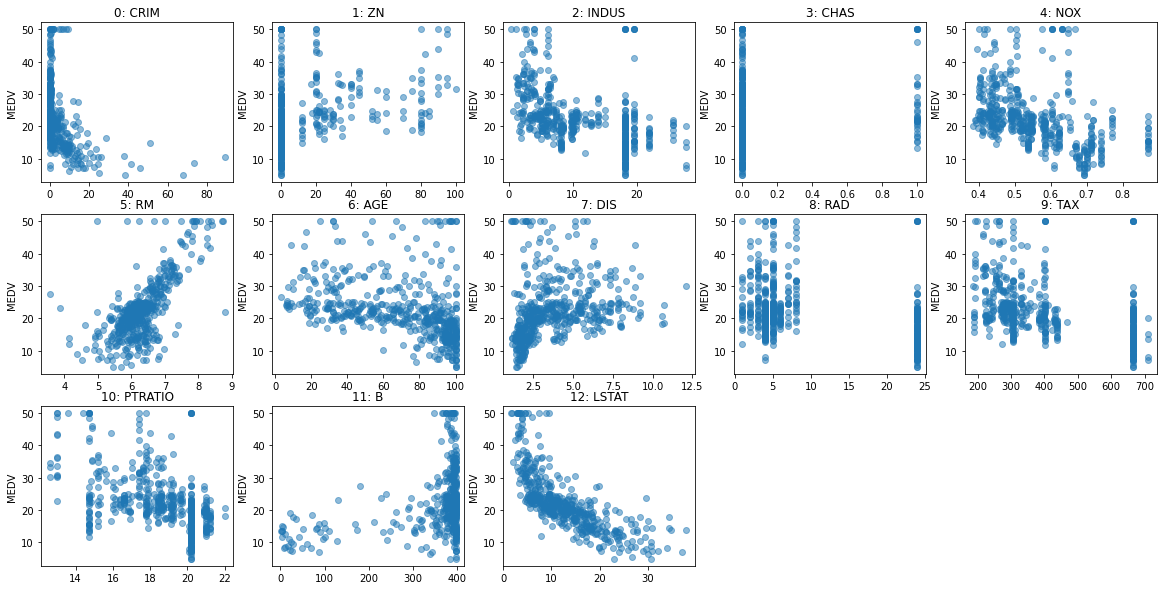

In [5]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [6]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


## Linear Regression

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2 $$

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

### Simple example

In [8]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
## Create linear regression object
linear_regressor = LinearRegression()

# Train the model using the training sets
linear_regressor.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', linear_regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, linear_regressor.predict(X_test)))
# Explained variance score: 1 is perfect prediction
print('R^2 (training): %f' % r2_score(y_train, linear_regressor.predict(X_train)))
print('R^2 (testing): %f' % r2_score(y_test, linear_regressor.predict(X_test)))

Coefficients: 
 [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
Mean squared error: 22.10
R^2 (training): 0.748087
R^2 (testing): 0.684427


### Plotting Cross-Validated Predictions

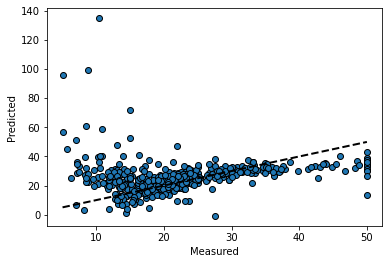

In [10]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(linear_regressor, boston.data, y, cv=3)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [11]:
results = cross_val_score(linear_regressor, X_train, y_train, cv=10)
print(results)
print("mean: ", np.mean(results))


[0.7832738  0.70313102 0.55559062 0.7328346  0.82883292 0.699766
 0.80487399 0.71770265 0.78880787 0.54531972]
mean:  0.7160133196648374


### Plotting learning curve

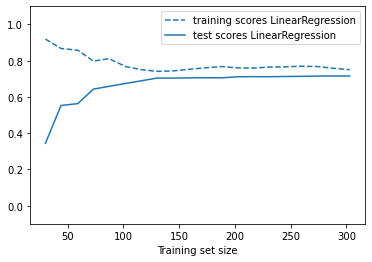

In [12]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=5)
    
    estimator_name = est.__class__.__name__
    
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure()   
plot_learning_curve(LinearRegression(), X_train, y_train)

## Ridge Regression (L2 penalty)

**The Ridge estimator** is a simple regularization (called l2 penalty) of the ordinary LinearRegression. In particular, it has the benefit of being not computationally more expensive than the ordinary least square estimate.

$$ \text{min}_{w,b}  \sum_i || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_2^2$$ 

The amount of regularization is set via the `alpha` parameter of the Ridge.

In [13]:
# Create linear regression object
ridge_regressor = Ridge()

# Train the model using the training sets
ridge_regressor.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', ridge_regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, ridge_regressor.predict(X_test)))
# Explained variance score: 1 is perfect prediction
print('R^2 (training): %f' % r2_score(y_train, ridge_regressor.predict(X_train)))
print('R^2 (testing): %f' % r2_score(y_test, ridge_regressor.predict(X_test)))

Coefficients: 
 [-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]
Mean squared error: 22.48
R^2 (training): 0.746116
R^2 (testing): 0.678975


### Tuning the hyperparameter alpha

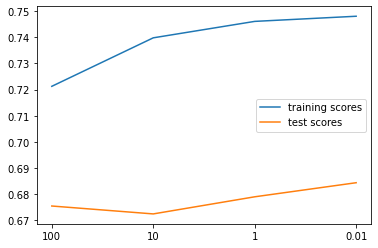

In [14]:
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best")

Tuning alpha is critical for performance.

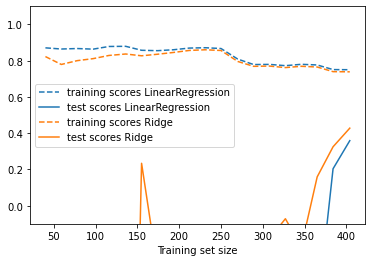

In [15]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)

### Using GridSearchCV to set the best alpha 

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 14)}
print(param_grid)

grid_search = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search.best_estimator_.score(X_test, y_test)))

{'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])}
Test set score: 0.68
Best parameters: {'alpha': 0.07017038286703829}
Best cross-validation score: 0.72
Best estimator:
Ridge(alpha=0.07017038286703829)
Accuracy on the testing set: 0.6840


### Another way to plot the performance

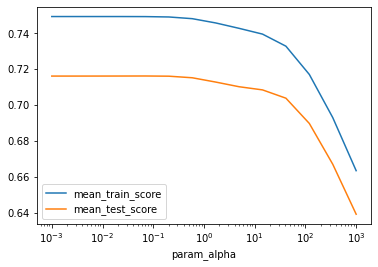

In [17]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.xscale("log")


## Lasso (L1 penalty)
**The Lasso estimator** is useful to impose sparsity on the coefficient. In other words, it is to be prefered if we believe that many of the features are not relevant. This is done via the so-called l1 penalty.

$$ \text{min}_{w, b} \sum_i \frac{1}{2} || w^\mathsf{T}x_i + b  - y_i||^2  + \alpha ||w||_1$$ 

In [18]:
param_grid = {'alpha': np.logspace(-1.5, 0, 14)}

print(param_grid)

grid_search = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search.best_estimator_.score(X_test, y_test)))

{'alpha': array([0.03162278, 0.04124626, 0.05379838, 0.07017038, 0.09152473,
       0.11937766, 0.15570684, 0.20309176, 0.26489693, 0.34551073,
       0.45065703, 0.58780161, 0.76668221, 1.        ])}
Test set score: 0.68
Best parameters: {'alpha': 0.03162277660168379}
Best cross-validation score: 0.71
Best estimator:
Lasso(alpha=0.03162277660168379)
Accuracy on the testing set: 0.6756


Instead of picking Ridge *or* Lasso, you can also use [ElasticNet](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html), which uses both forms of regularization and provides a parameter to assign a weighting between them. ElasticNet typically performs the best amongst these models.

<div class="alert alert-success">
    <b>HOMEWORK</b>:
     <ul>
Load the diabetes dataset using ``sklearn.datasets.load_diabetes``. Apply ``LinearRegression``, ``Ridge`` and ``Lasso`` and visualize the coefficients. Try polynomial features.
    </ul>
</div>

In [19]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [20]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [21]:
n_samples, n_features = diabetes.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
print(diabetes.data[0])

Number of samples: 442
Number of features: 10
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


In [22]:
X, y = diabetes.data, diabetes.target

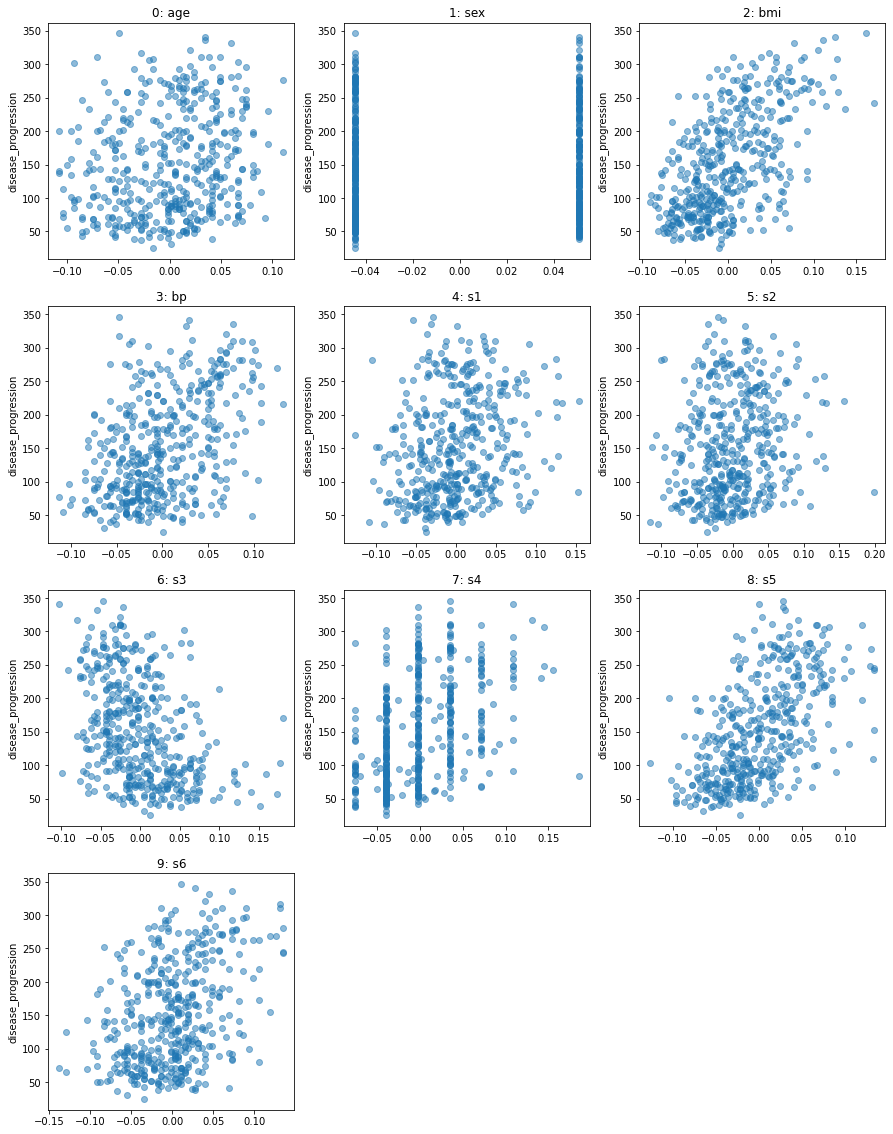

In [23]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
for j, ax1 in enumerate(axes.ravel()):
    if j > 9:
        ax1.set_visible(False)
        continue
    ax1.plot(X[:, j], y, 'o', alpha=.5)
    ax1.set_title("{}: {}".format(j, diabetes.feature_names[j]))
    ax1.set_ylabel("disease_progression")

In [24]:
data = pd.DataFrame(data= diabetes['data'],
                     columns= diabetes['feature_names'])
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

polynomials = pd.DataFrame(poly.fit_transform(X))

In [26]:
polynomials

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,...,0.001884,0.000113,-0.000864,0.000766,0.000007,-0.000052,0.000046,0.000396,-0.000351,0.000311
1,1.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,...,0.005537,-0.002939,-0.005085,-0.006861,0.001560,0.002699,0.003641,0.004669,0.006300,0.008502
2,1.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,...,0.001047,0.000084,-0.000093,0.000839,0.000007,-0.000007,0.000067,0.000008,-0.000074,0.000672
3,1.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,...,0.001299,-0.001236,-0.000818,0.000337,0.001177,0.000779,-0.000321,0.000515,-0.000212,0.000088
4,1.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,...,0.000066,-0.000021,-0.000260,-0.000380,0.000007,0.000083,0.000121,0.001023,0.001492,0.002175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,1.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,...,0.000822,0.000074,-0.000894,-0.000207,0.000007,-0.000081,-0.000019,0.000973,0.000225,0.000052
438,1.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,...,0.000822,-0.000984,0.000520,-0.001276,0.001177,-0.000622,0.001526,0.000328,-0.000806,0.001979
439,1.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,...,0.000625,0.000277,0.001172,-0.000387,0.000123,0.000519,-0.000172,0.002198,-0.000726,0.000240
440,1.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,...,0.000822,-0.000762,-0.001277,0.000744,0.000705,0.001183,-0.000689,0.001983,-0.001155,0.000672


In [27]:
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(data.columns,p) for p in poly.powers_]]


In [28]:
polynomials
for a,b in zip(polynomials.columns,target_feature_names):
    polynomials = polynomials.rename(columns={a:b})

In [29]:
polynomials

,,age^1,sex^1,bmi^1,bp^1,s1^1,s2^1,s3^1,s4^1,s5^1,...,s3^2,s3^1xs4^1,s3^1xs5^1,s3^1xs6^1,s4^2,s4^1xs5^1,s4^1xs6^1,s5^2,s5^1xs6^1,s6^2
0,1.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,...,0.001884,0.000113,-0.000864,0.000766,0.000007,-0.000052,0.000046,0.000396,-0.000351,0.000311
1,1.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,...,0.005537,-0.002939,-0.005085,-0.006861,0.001560,0.002699,0.003641,0.004669,0.006300,0.008502
2,1.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,...,0.001047,0.000084,-0.000093,0.000839,0.000007,-0.000007,0.000067,0.000008,-0.000074,0.000672
3,1.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,...,0.001299,-0.001236,-0.000818,0.000337,0.001177,0.000779,-0.000321,0.000515,-0.000212,0.000088
4,1.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,...,0.000066,-0.000021,-0.000260,-0.000380,0.000007,0.000083,0.000121,0.001023,0.001492,0.002175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,1.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,...,0.000822,0.000074,-0.000894,-0.000207,0.000007,-0.000081,-0.000019,0.000973,0.000225,0.000052
438,1.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,...,0.000822,-0.000984,0.000520,-0.001276,0.001177,-0.000622,0.001526,0.000328,-0.000806,0.001979
439,1.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,...,0.000625,0.000277,0.001172,-0.000387,0.000123,0.000519,-0.000172,0.002198,-0.000726,0.000240
440,1.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,...,0.000822,-0.000762,-0.001277,0.000744,0.000705,0.001183,-0.000689,0.001983,-0.001155,0.000672


In [30]:
del polynomials[polynomials.columns[0]]
polynomials

,age^1,sex^1,bmi^1,bp^1,s1^1,s2^1,s3^1,s4^1,s5^1,s6^1,...,s3^2,s3^1xs4^1,s3^1xs5^1,s3^1xs6^1,s4^2,s4^1xs5^1,s4^1xs6^1,s5^2,s5^1xs6^1,s6^2
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,...,0.001884,0.000113,-0.000864,0.000766,0.000007,-0.000052,0.000046,0.000396,-0.000351,0.000311
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,...,0.005537,-0.002939,-0.005085,-0.006861,0.001560,0.002699,0.003641,0.004669,0.006300,0.008502
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,...,0.001047,0.000084,-0.000093,0.000839,0.000007,-0.000007,0.000067,0.000008,-0.000074,0.000672
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,...,0.001299,-0.001236,-0.000818,0.000337,0.001177,0.000779,-0.000321,0.000515,-0.000212,0.000088
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,...,0.000066,-0.000021,-0.000260,-0.000380,0.000007,0.000083,0.000121,0.001023,0.001492,0.002175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,...,0.000822,0.000074,-0.000894,-0.000207,0.000007,-0.000081,-0.000019,0.000973,0.000225,0.000052
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,...,0.000822,-0.000984,0.000520,-0.001276,0.001177,-0.000622,0.001526,0.000328,-0.000806,0.001979
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,...,0.000625,0.000277,0.001172,-0.000387,0.000123,0.000519,-0.000172,0.002198,-0.000726,0.000240
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,...,0.000822,-0.000762,-0.001277,0.000744,0.000705,0.001183,-0.000689,0.001983,-0.001155,0.000672


In [31]:
#without polynomials
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
X1, y1 = polynomials, diabetes.target
#with polynomials
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42)

## Linear Regression

In [33]:
linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

print('Coefficients: \n', linear_regressor.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, linear_regressor.predict(X_test)))
print('R^2 (training): %f' % r2_score(y_train, linear_regressor.predict(X_train)))
print('R^2 (testing): %f' % r2_score(y_test, linear_regressor.predict(X_test)))
print('')
for a,b in zip(diabetes.feature_names, linear_regressor.coef_):
             print(a,b)
Lin = pd.DataFrame()
for a,b in zip(diabetes.feature_names, linear_regressor.coef_):
    Lin[a]=[b]
Lin

Coefficients: 
 [  47.74657117 -241.99180361  531.96856896  381.56529922 -918.49020552
  508.25147385  116.94040498  269.48508571  695.8062205    26.32343144]
Mean squared error: 2848.30
R^2 (training): 0.519035
R^2 (testing): 0.484909

age 47.74657117353168
sex -241.9918036108797
bmi 531.9685689647101
bp 381.56529921822437
s1 -918.4902055208927
s2 508.25147384684783
s3 116.94040498015795
s4 269.4850857088444
s5 695.8062205026977
s6 26.32343144126704


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,47.746571,-241.991804,531.968569,381.565299,-918.490206,508.251474,116.940405,269.485086,695.806221,26.323431


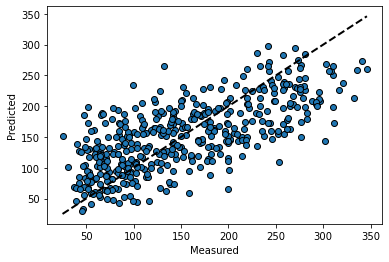

In [34]:
predicted = cross_val_predict(linear_regressor, diabetes.data, y, cv=3)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [35]:
results = cross_val_score(linear_regressor, X_train, y_train, cv=10)
print(results)
print("mean: ", np.mean(results))



[ 0.54111931  0.51944517  0.32489667  0.44508111  0.4002623   0.59269724
  0.73165402  0.48322817 -0.16202336  0.3655042 ]
mean:  0.42418648219741345


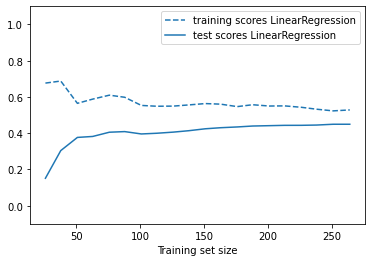

In [36]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=5)
    
    estimator_name = est.__class__.__name__
    
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure()   
plot_learning_curve(LinearRegression(), X_train, y_train)

## Linear Regression with Polynomials

In [37]:
linear_regressor = LinearRegression()

linear_regressor.fit(X_train1, y_train1)

print('Coefficients: \n', linear_regressor.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test1, linear_regressor.predict(X_test1)))
print('R^2 (training): %f' % r2_score(y_train1, linear_regressor.predict(X_train1)))
print('R^2 (testing): %f' % r2_score(y_test1, linear_regressor.predict(X_test1)))
print('')
for a,b in zip(polynomials.columns, linear_regressor.coef_):
             print(a,b)
Lin1 = pd.DataFrame()
for a,b in zip(polynomials.columns, linear_regressor.coef_):
    Lin1[a]=[b]
Lin1

Coefficients: 
 [ 1.32642980e+02 -3.15004471e+02  3.84957606e+02  4.39241924e+02
  5.02027202e+03 -4.48127902e+03 -2.31578214e+03 -8.85452650e+01
 -1.00092669e+03 -3.05081149e+01  2.89879064e+03  1.10306759e+03
 -1.83851859e+03  1.78364603e+03  4.22892525e+02 -8.05093696e+03
  3.74416594e+03  8.86748258e+03  2.59795493e+02  1.38634266e+02
 -1.90214866e+00 -6.33510865e+02  1.53358238e+03 -3.79881175e+03
  5.60867480e+03 -3.65649510e+02 -5.80259898e+03  4.32780141e+03
  9.05493901e+02  8.02938320e+02  3.84826024e+03 -8.17365056e+03
  7.52821923e+03  1.56367879e+03 -1.40282276e+03  3.42363474e+03
  1.17851527e+03 -4.52658099e+01  2.25026823e+04 -1.65164448e+04
 -9.59117116e+03 -2.05625718e+03 -9.55416401e+03 -4.24843309e+03
  1.11336345e+05 -1.70308073e+05 -7.30421611e+04 -1.13435017e+04
 -1.35425526e+05 -6.70875126e+03  6.71857845e+04  4.88884938e+04
 -2.37382393e+03  1.11477025e+05  3.27159490e+03  1.32943681e+04
  9.06550375e+03  4.82258762e+04  7.44575975e+03  9.36755320e+03
 -4.18881

,age^1,sex^1,bmi^1,bp^1,s1^1,s2^1,s3^1,s4^1,s5^1,s6^1,...,s3^2,s3^1xs4^1,s3^1xs5^1,s3^1xs6^1,s4^2,s4^1xs5^1,s4^1xs6^1,s5^2,s5^1xs6^1,s6^2
0,132.64298,-315.004471,384.957606,439.241924,5020.272022,-4481.279019,-2315.78214,-88.545265,-1000.926686,-30.508115,...,13294.368056,9065.503751,48225.876214,7445.759748,9367.553205,-418.881307,5458.5755,24433.44111,4737.146973,1567.257625


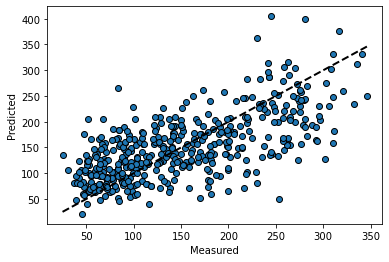

In [38]:
predicted = cross_val_predict(linear_regressor, X1, y1, cv=3)

fig, ax = plt.subplots()
ax.scatter(y1, predicted, edgecolors=(0, 0, 0))
ax.plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [39]:
results1 = cross_val_score(linear_regressor, X_train1, y_train1, cv=10)
print(results1)
print("mean: ", np.mean(results1))



[ 0.57624752  0.37880181  0.26799001  0.10976368  0.3547548   0.20320909
  0.59031319  0.34654928 -0.27733128  0.28903294]
mean:  0.28393310320854703


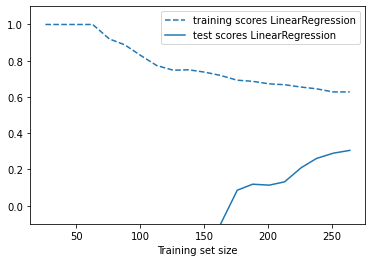

In [40]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X1, y1):
    training_set_size, train_scores, test_scores = learning_curve(est, X1, y1, train_sizes=np.linspace(.1, 1, 20), cv=5)
    
    estimator_name = est.__class__.__name__
    
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure()   
plot_learning_curve(LinearRegression(), X_train1, y_train1)

## Ridge Regression

In [41]:
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)

print('Coefficients: \n', ridge_regressor.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, ridge_regressor.predict(X_test)))
print('R^2 (training): %f' % r2_score(y_train, ridge_regressor.predict(X_train)))
print('R^2 (testing): %f' % r2_score(y_test, ridge_regressor.predict(X_test)))
print('')
for a,b in zip(diabetes.feature_names, ridge_regressor.coef_):
             print(a,b)
Rid = pd.DataFrame()
for a,b in zip(diabetes.feature_names, ridge_regressor.coef_):
    Rid[a]=[b]
Rid

Coefficients: 
 [  50.55155508  -67.72236516  278.3007281   197.62401363   -6.2459735
  -26.22698465 -151.39451804  120.32319558  215.85469359  101.75554294]
Mean squared error: 3105.47
R^2 (training): 0.427303
R^2 (testing): 0.438401

age 50.551555077544975
sex -67.72236516191374
bmi 278.3007280953464
bp 197.62401362667572
s1 -6.245973495502152
s2 -26.226984645528493
s3 -151.39451803736253
s4 120.32319558369434
s5 215.85469358603575
s6 101.75554294357165


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,50.551555,-67.722365,278.300728,197.624014,-6.245973,-26.226985,-151.394518,120.323196,215.854694,101.755543


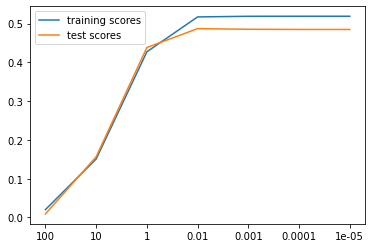

In [42]:
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01, .001, .0001, .00001]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(7), [100, 10, 1, .01, .001, .0001, .00001])
plt.legend(loc="best")

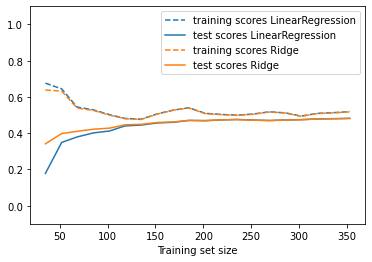

In [43]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=0.01), X, y)

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 14)}
print(param_grid)

grid_search = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search.best_estimator_.score(X_test, y_test)))

{'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])}
Test set score: 0.49
Best parameters: {'alpha': 0.07017038286703829}
Best cross-validation score: 0.43
Best estimator:
Ridge(alpha=0.07017038286703829)
Accuracy on the testing set: 0.4909


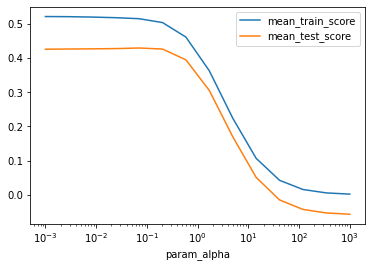

In [45]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.xscale("log")


## Ridge regression with polynomials

In [46]:
ridge_regressor = Ridge()
ridge_regressor.fit(X_train1, y_train1)

print('Coefficients: \n', ridge_regressor.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test1, ridge_regressor.predict(X_test1)))
print('R^2 (training): %f' % r2_score(y_train1, ridge_regressor.predict(X_train1)))
print('R^2 (testing): %f' % r2_score(y_test1, ridge_regressor.predict(X_test1)))
print('')
for a,b in zip(polynomials.columns, ridge_regressor.coef_):
             print(a,b)
Rid1 = pd.DataFrame()
for a,b in zip(polynomials.columns, ridge_regressor.coef_):
    Rid1[a]=[b]
Rid1

Coefficients: 
 [ 5.07010359e+01 -6.77097946e+01  2.77934466e+02  1.97486305e+02
 -6.10685579e+00 -2.59471966e+01 -1.51334283e+02  1.20206172e+02
  2.15701815e+02  1.01590537e+02  2.70925903e+00  5.40143054e+00
  5.73068113e-01  4.45050241e+00 -3.22717241e+00 -4.98995094e+00
 -1.69795146e+00  4.45116761e-01  3.64431937e+00  2.52484159e+00
 -4.08864392e-01  2.25545080e+00  4.50143474e+00 -3.05111109e-01
 -2.07580808e+00  1.45125546e-01  3.95678897e-01  3.56671429e+00
  2.27719785e+00  1.53725978e+01  8.30584099e+00 -3.11183147e+00
 -2.95799225e+00 -4.80885782e+00  3.22470123e+00  3.64790026e+00
  6.98768598e+00  7.27673945e+00  2.45833443e-02 -1.83037585e+00
 -6.99962003e-02 -8.02459099e-02  3.85053740e+00  2.44245961e+00
 -6.49274306e-01 -1.50362428e+00  1.40365149e+00 -1.50970666e+00
 -1.23197446e+00  8.15055460e-01 -2.05105496e+00  1.71002670e+00
 -1.62707834e+00 -2.36911033e+00 -3.84568266e-01 -5.28425577e-01
 -1.43489858e+00  6.44221447e-01 -2.86449617e+00  3.31967153e+00
 -1.64304

,age^1,sex^1,bmi^1,bp^1,s1^1,s2^1,s3^1,s4^1,s5^1,s6^1,...,s3^2,s3^1xs4^1,s3^1xs5^1,s3^1xs6^1,s4^2,s4^1xs5^1,s4^1xs6^1,s5^2,s5^1xs6^1,s6^2
0,50.701036,-67.709795,277.934466,197.486305,-6.106856,-25.947197,-151.334283,120.206172,215.701815,101.590537,...,-0.528426,-1.434899,0.644221,-2.864496,3.319672,-0.164305,4.579193,0.361649,5.391701,7.473695


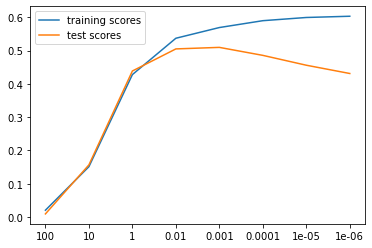

In [47]:
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01, .001, .0001, .00001, .000001]:
    ridge = Ridge(alpha=alpha).fit(X_train1, y_train1)
    training_scores.append(ridge.score(X_train1, y_train1))
    test_scores.append(ridge.score(X_test1, y_test1))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(8), [100, 10, 1, .01, .001, .0001, .00001, .000001])
plt.legend(loc="best")

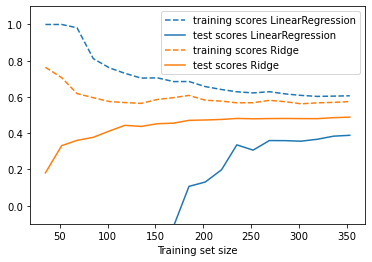

In [48]:
plt.figure()
plot_learning_curve(LinearRegression(), X1, y1)
plot_learning_curve(Ridge(alpha=0.001), X1, y1)

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 14)}
print(param_grid)

grid_search = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train1, y_train1)

print("Test set score: {:.2f}".format(grid_search.score(X_test1, y_test1)))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search.best_estimator_.score(X_test1, y_test1)))

{'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])}
Test set score: 0.50
Best parameters: {'alpha': 0.07017038286703829}
Best cross-validation score: 0.43
Best estimator:
Ridge(alpha=0.07017038286703829)
Accuracy on the testing set: 0.4957


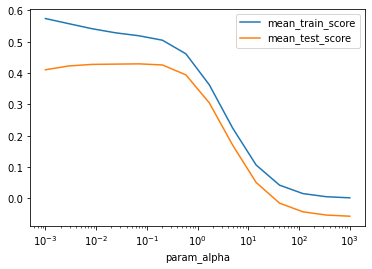

In [50]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.xscale("log")


## Lasso Regression


In [51]:
lasso_regressor = Lasso()
lasso_regressor.fit(X_train, y_train)

print('Coefficients: \n', lasso_regressor.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, lasso_regressor.predict(X_test)))
print('R^2 (training): %f' % r2_score(y_train, lasso_regressor.predict(X_train)))
print('R^2 (testing): %f' % r2_score(y_test, lasso_regressor.predict(X_test)))
print('')
for a,b in zip(diabetes.feature_names, lasso_regressor.coef_):
             print(a,b)
Las = pd.DataFrame()
for a,b in zip(diabetes.feature_names, lasso_regressor.coef_):
    Las[a]=[b]
Las

Coefficients: 
 [  0.          -0.         398.38436775  46.17884277   0.
   0.          -0.           0.         238.18740159   0.        ]
Mean squared error: 3433.15
R^2 (training): 0.346874
R^2 (testing): 0.379142

age 0.0
sex -0.0
bmi 398.38436775275096
bp 46.17884276748442
s1 0.0
s2 0.0
s3 -0.0
s4 0.0
s5 238.18740158749839
s6 0.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.0,-0.0,398.384368,46.178843,0.0,0.0,-0.0,0.0,238.187402,0.0


Some variable weights were penalized down to zero. Lasso model decided that they are irrelevant

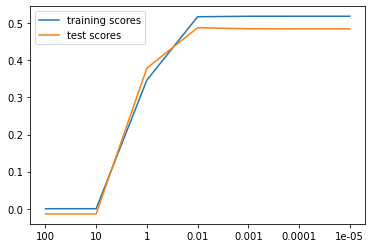

In [52]:
lasso_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01, .001, .0001, .00001]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso

plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(7), [100, 10, 1, .01, .001, .0001, .00001])
plt.legend(loc="best")

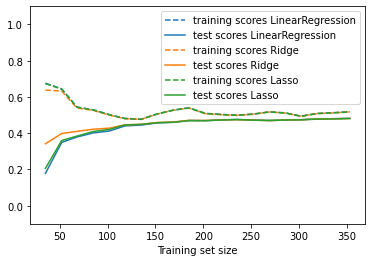

In [53]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=0.01), X, y)
plot_learning_curve(Lasso(alpha=0.01), X, y)


In [54]:
param_grid = {'alpha': np.logspace(-1.5, 0, 14)}

print(param_grid)

grid_search = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search.best_estimator_.score(X_test, y_test)))

{'alpha': array([0.03162278, 0.04124626, 0.05379838, 0.07017038, 0.09152473,
       0.11937766, 0.15570684, 0.20309176, 0.26489693, 0.34551073,
       0.45065703, 0.58780161, 0.76668221, 1.        ])}
Test set score: 0.50
Best parameters: {'alpha': 0.09152473108773893}
Best cross-validation score: 0.43
Best estimator:
Lasso(alpha=0.09152473108773893)
Accuracy on the testing set: 0.5018


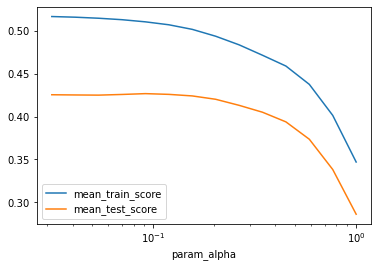

In [55]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.xscale("log")


## Lasso Regression with polynomials


In [56]:
lasso_regressor = Lasso()
lasso_regressor.fit(X_train1, y_train1)

print('Coefficients: \n', lasso_regressor.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test1, lasso_regressor.predict(X_test1)))
print('R^2 (training): %f' % r2_score(y_train1, lasso_regressor.predict(X_train1)))
print('R^2 (testing): %f' % r2_score(y_test1, lasso_regressor.predict(X_test1)))
print('')
for a,b in zip(polynomials.columns, lasso_regressor.coef_):
             print(a,b)
Las1 = pd.DataFrame()
for a,b in zip(polynomials.columns, lasso_regressor.coef_):
    Las1[a]=[b]
Las1

Coefficients: 
 [  0.          -0.         398.38436775  46.17884277   0.
   0.          -0.           0.         238.18740159   0.
   0.           0.           0.           0.          -0.
  -0.          -0.           0.           0.           0.
  -0.           0.           0.          -0.          -0.
   0.           0.           0.           0.           0.
   0.          -0.          -0.          -0.           0.
   0.           0.           0.           0.          -0.
  -0.           0.           0.           0.          -0.
  -0.          -0.           0.          -0.           0.
  -0.           0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.           0.
   0.           0.           0.           0.           0.        ]
Mean squared error: 3433.15
R^2 (training): 0.346874
R^2 (testing): 0.379142

age^1 0.0
sex^1 -0.0
bmi^1 398.38436775275096
bp^1 46.17884276748442
s1^1 0.0
s2^1 0.0
s3^1 -0.0
s4^1 0.0
s5^1 238.18740158749839
s6^1 0.0
age^

,age^1,sex^1,bmi^1,bp^1,s1^1,s2^1,s3^1,s4^1,s5^1,s6^1,...,s3^2,s3^1xs4^1,s3^1xs5^1,s3^1xs6^1,s4^2,s4^1xs5^1,s4^1xs6^1,s5^2,s5^1xs6^1,s6^2
0,0.0,-0.0,398.384368,46.178843,0.0,0.0,-0.0,0.0,238.187402,0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0


D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207998.7787463996, tolerance: 200.07707371601208
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 312903.0108714925, tolerance: 200.07707371601208
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375053.6797730143, tolerance: 200.07707371601208
  model = cd_fast.enet_coordinate_descent(


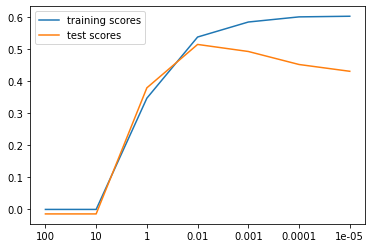

In [57]:
lasso_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01, .001, .0001, .00001]:
    lasso = Lasso(alpha=alpha).fit(X_train1, y_train1)
    training_scores.append(lasso.score(X_train1, y_train1))
    test_scores.append(lasso.score(X_test1, y_test1))
    lasso_models[alpha] = lasso

plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(7), [100, 10, 1, .01, .001, .0001, .00001])
plt.legend(loc="best")

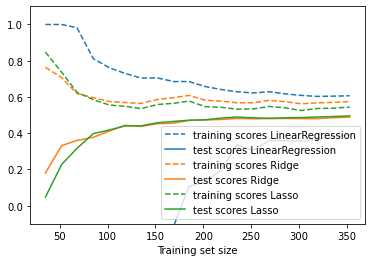

In [58]:
plt.figure()
plot_learning_curve(LinearRegression(), X1, y1)
plot_learning_curve(Ridge(alpha=0.001), X1, y1)
plot_learning_curve(Lasso(alpha=0.01), X1, y1)


In [59]:
param_grid = {'alpha': np.logspace(-1.5, 0, 14)}

print(param_grid)

grid_search = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train1, y_train1)

print("Test set score: {:.2f}".format(grid_search.score(X_test1, y_test1)))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print('Accuracy on the testing set: {:.4f}'.format(grid_search.best_estimator_.score(X_test1, y_test1)))

{'alpha': array([0.03162278, 0.04124626, 0.05379838, 0.07017038, 0.09152473,
       0.11937766, 0.15570684, 0.20309176, 0.26489693, 0.34551073,
       0.45065703, 0.58780161, 0.76668221, 1.        ])}
Test set score: 0.50
Best parameters: {'alpha': 0.09152473108773893}
Best cross-validation score: 0.43
Best estimator:
Lasso(alpha=0.09152473108773893)
Accuracy on the testing set: 0.5018


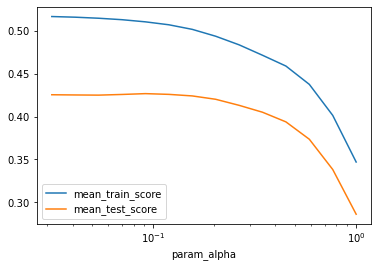

In [60]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.xscale("log")


## Model coefficients


In [61]:
results = pd.DataFrame({
    'Model': ['linear', 'ridgecv', 'lasso']})
result_df = results
result_df1 = pd.concat([Lin, Rid, Las])
result_df2 = pd.concat([result_df.reset_index(drop=True), result_df1.reset_index(drop=True)], axis=1)
result_df2

,Model,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,linear,47.746571,-241.991804,531.968569,381.565299,-918.490206,508.251474,116.940405,269.485086,695.806221,26.323431
1,ridgecv,50.551555,-67.722365,278.300728,197.624014,-6.245973,-26.226985,-151.394518,120.323196,215.854694,101.755543
2,lasso,0.000000,-0.000000,398.384368,46.178843,0.000000,0.000000,-0.000000,0.000000,238.187402,0.000000


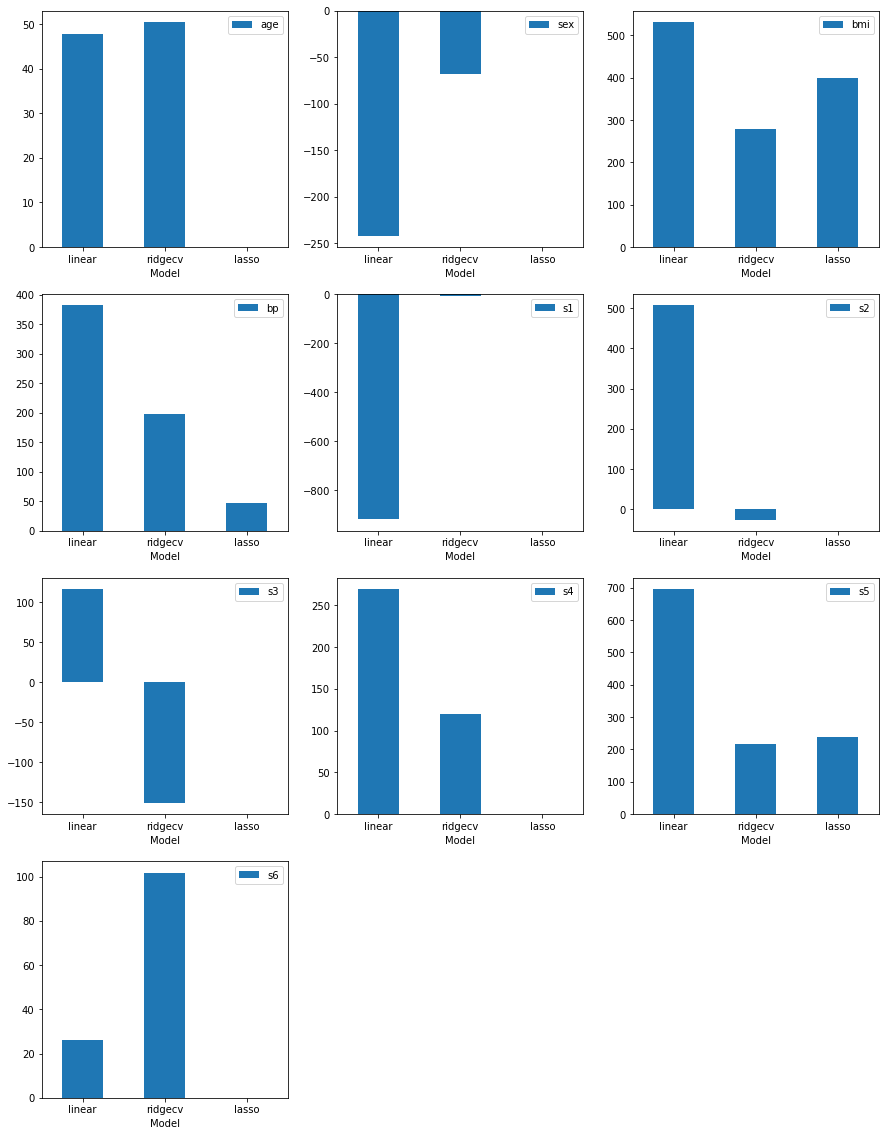

In [62]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
for j, ax in enumerate(axes.ravel()):
    if j > 9:
        ax.set_visible(False)
        continue

count=0
for i, ax in zip(result_df1.columns.values.tolist(), axes.ravel()):
    result_df2.plot(x='Model', y=i, rot=0, ax=ax, kind='bar')
    count=count+1

## Model coefficients (Polynomials)


In [63]:
poly_results = pd.DataFrame({
    'Model': ['linear', 'ridgecv', 'lasso']})
poly_result_df = poly_results
poly_result_df1 = pd.concat([Lin1, Rid1, Las1])
poly_result_df2 = pd.concat([poly_result_df.reset_index(drop=True), poly_result_df1.reset_index(drop=True)], axis=1)
poly_result_df2

,Model,age^1,sex^1,bmi^1,bp^1,s1^1,s2^1,s3^1,s4^1,s5^1,...,s3^2,s3^1xs4^1,s3^1xs5^1,s3^1xs6^1,s4^2,s4^1xs5^1,s4^1xs6^1,s5^2,s5^1xs6^1,s6^2
0,linear,132.642980,-315.004471,384.957606,439.241924,5020.272022,-4481.279019,-2315.782140,-88.545265,-1000.926686,...,13294.368056,9065.503751,48225.876214,7445.759748,9367.553205,-418.881307,5458.575500,24433.441110,4737.146973,1567.257625
1,ridgecv,50.701036,-67.709795,277.934466,197.486305,-6.106856,-25.947197,-151.334283,120.206172,215.701815,...,-0.528426,-1.434899,0.644221,-2.864496,3.319672,-0.164305,4.579193,0.361649,5.391701,7.473695
2,lasso,0.000000,-0.000000,398.384368,46.178843,0.000000,0.000000,-0.000000,0.000000,238.187402,...,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


D:\anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


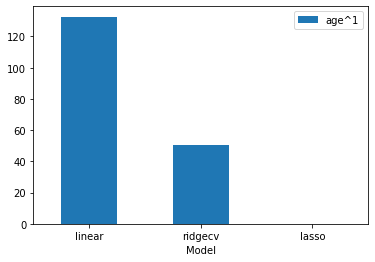

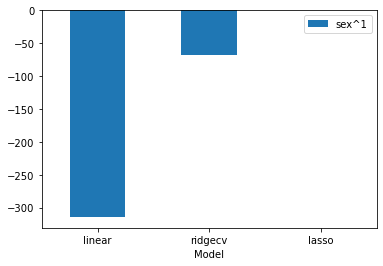

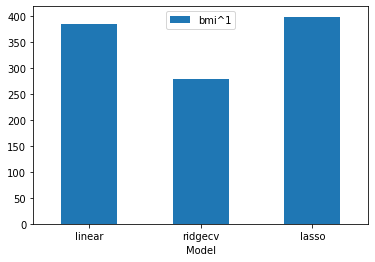

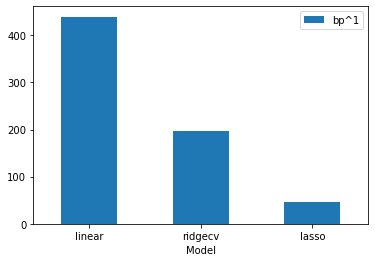

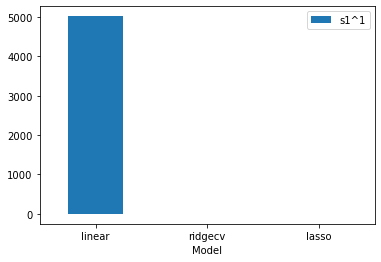

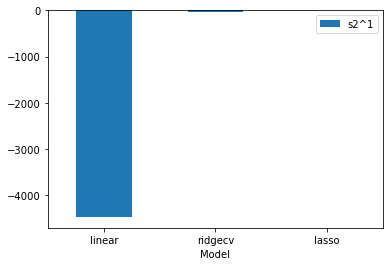

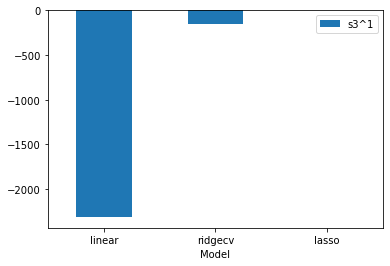

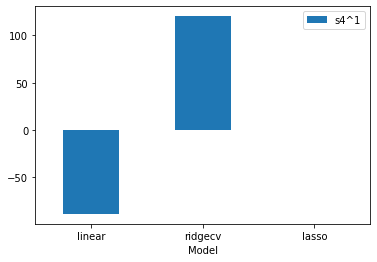

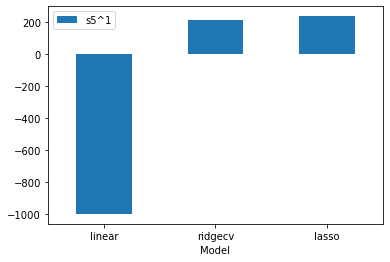

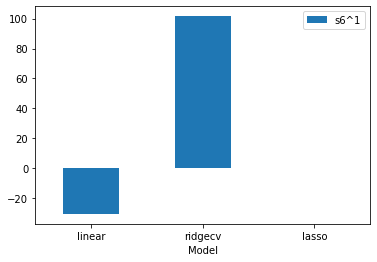

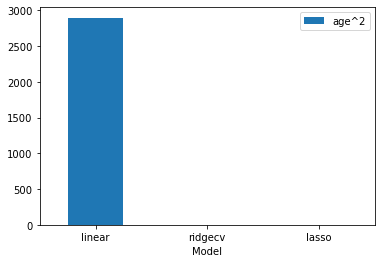

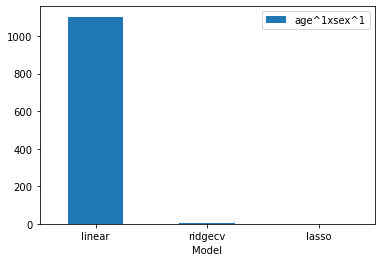

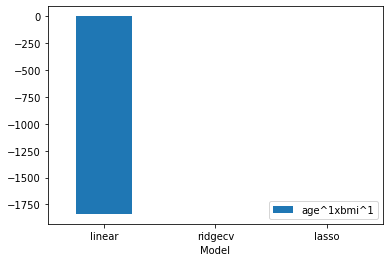

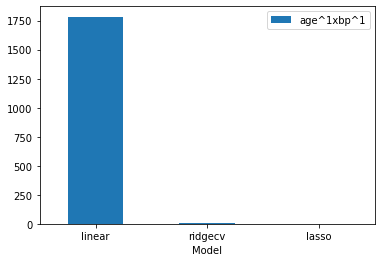

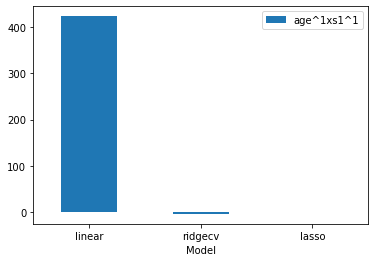

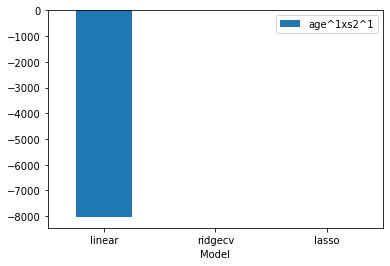

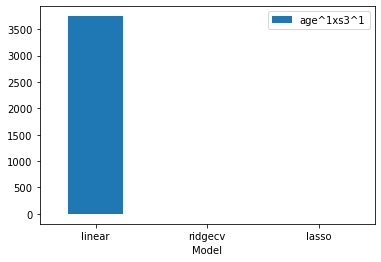

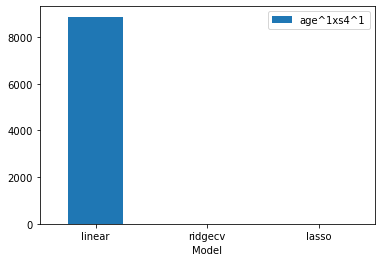

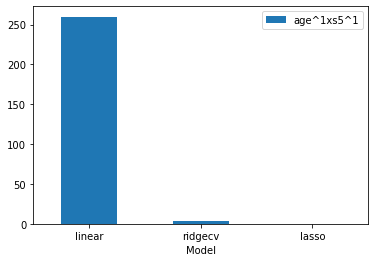

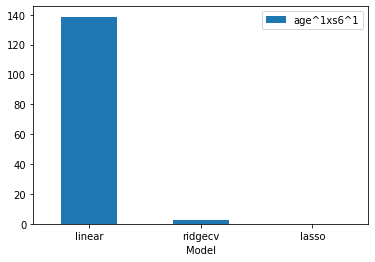

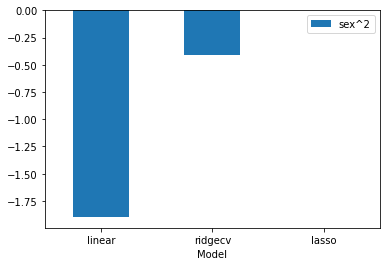

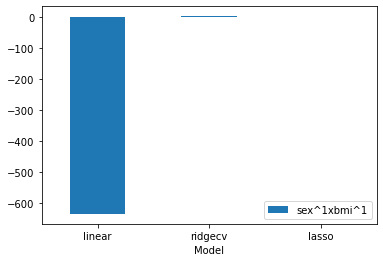

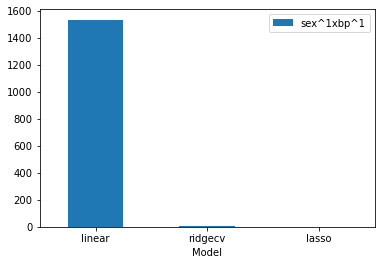

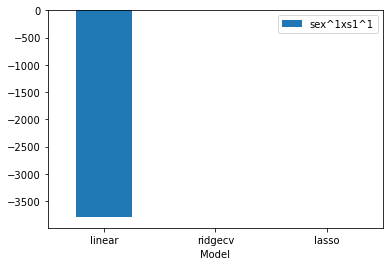

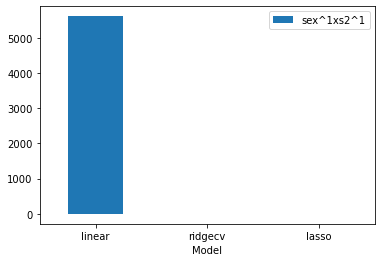

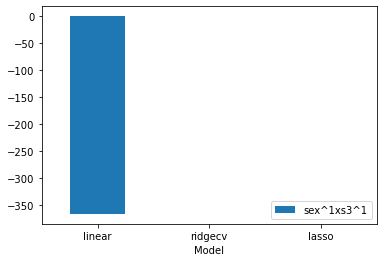

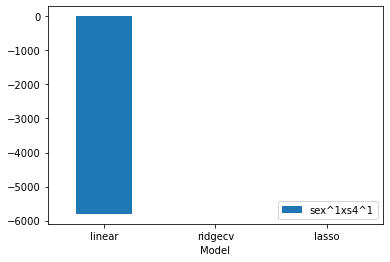

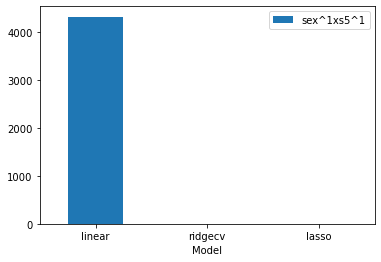

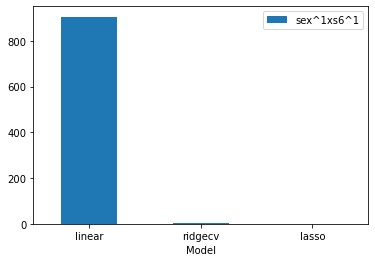

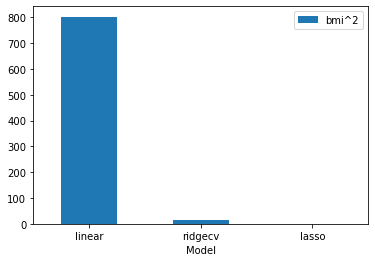

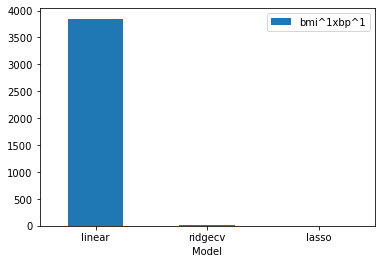

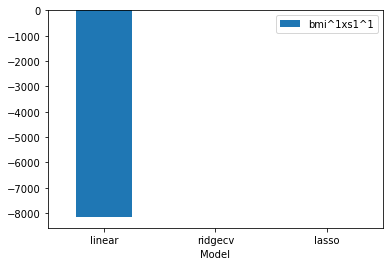

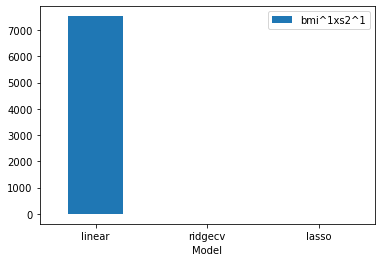

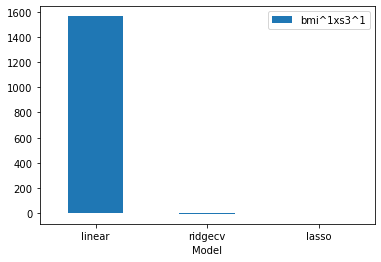

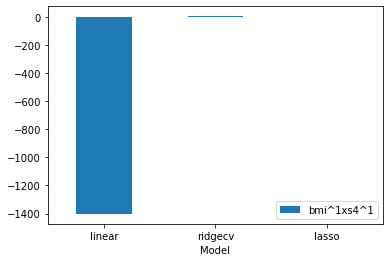

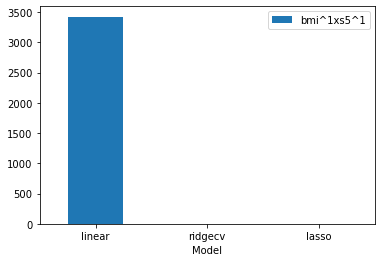

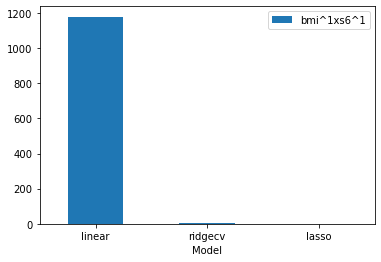

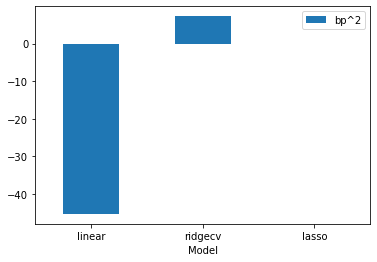

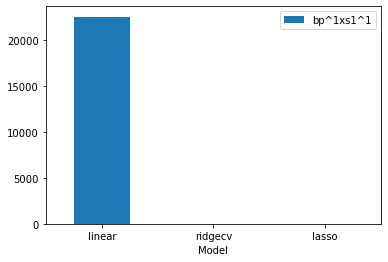

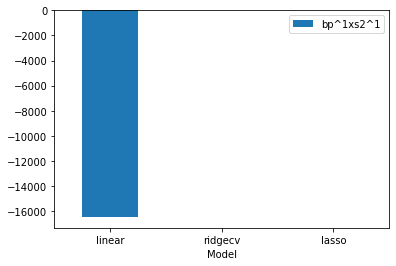

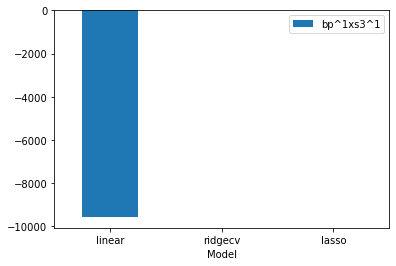

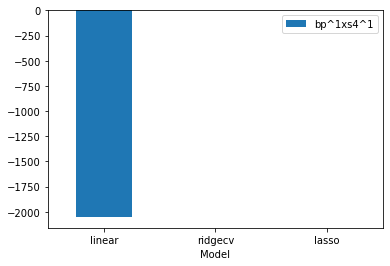

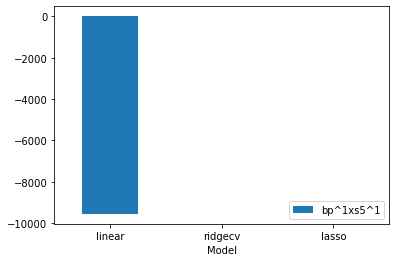

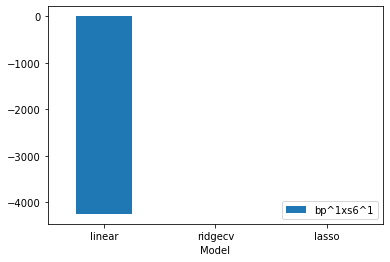

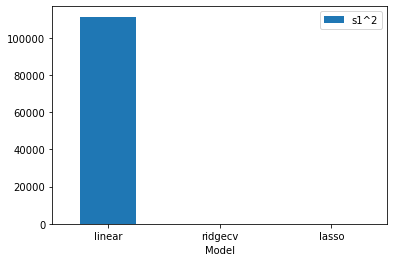

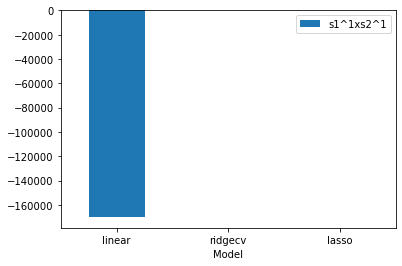

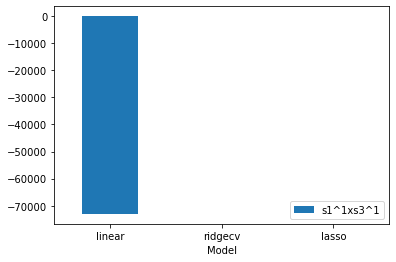

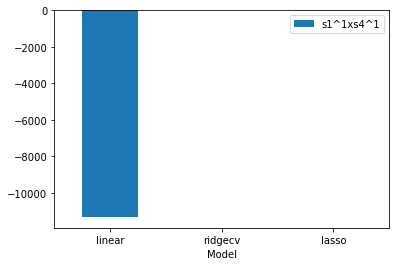

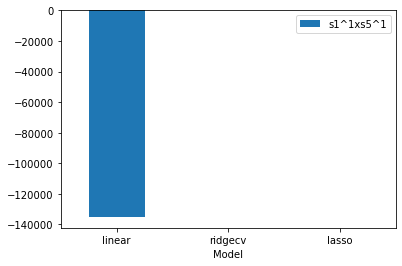

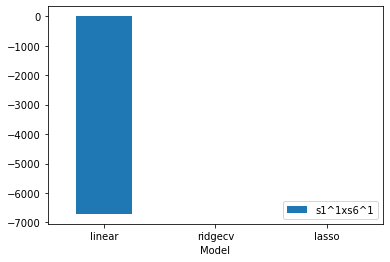

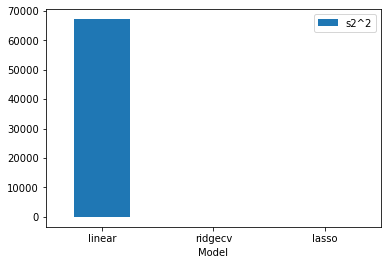

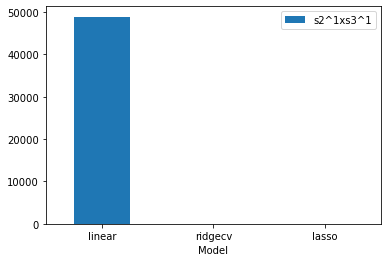

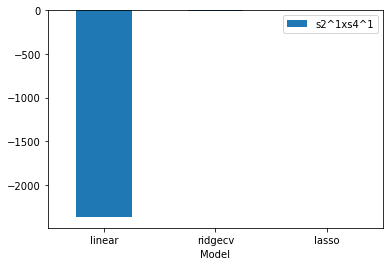

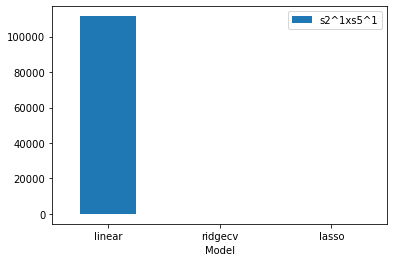

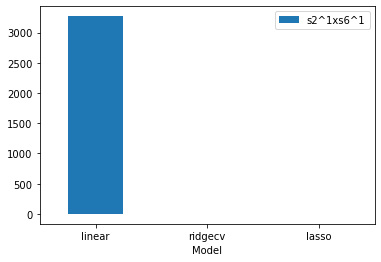

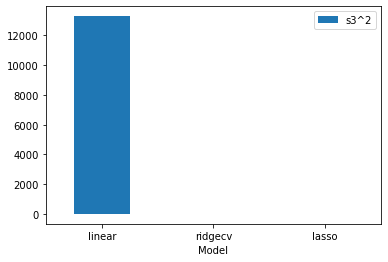

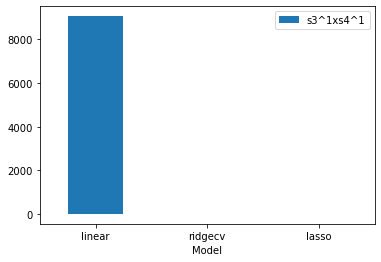

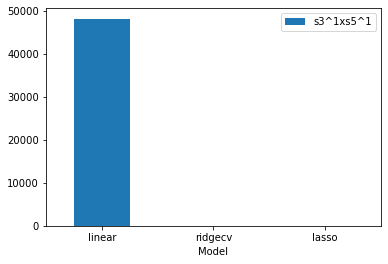

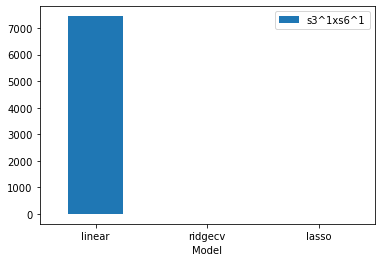

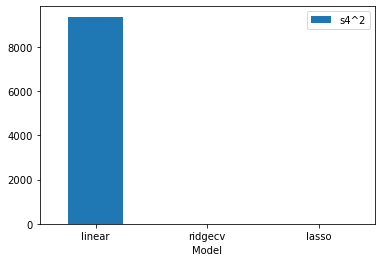

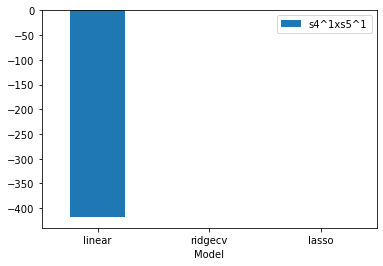

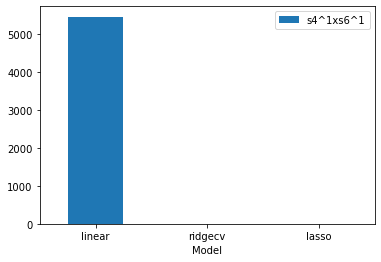

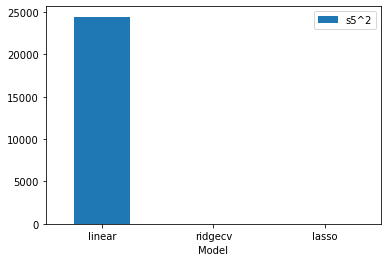

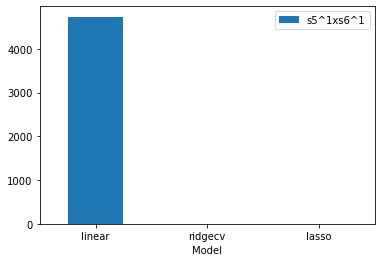

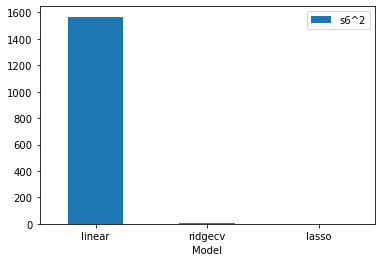

In [64]:

for i in polynomials.columns:
    poly_result_df2.plot(x='Model', y=i, rot=0, kind='bar')


Ridge and Lasso show that most of the polynomials were unnecessary. By penalizing some features, they slightly improved performance. 

In [65]:
# %load solutions/linear_models_diabetes.py

# Robust models (advanced - optional)

In [66]:
from sklearn.linear_model import HuberRegressor, RANSACRegressor

In [67]:

from sklearn.datasets import make_regression


n_samples = 1000
n_outliers = 50


X, y, coef = make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
model = LinearRegression()
model.fit(X, y)

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = model.predict(line_X)

Text(0, 0.5, 'response')

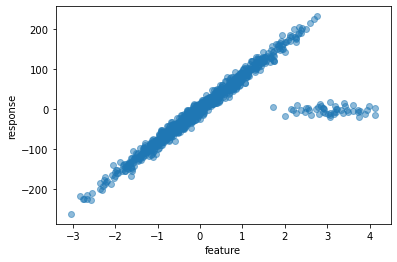

In [68]:
plt.scatter(X, y, alpha=.5)
plt.xlabel("feature")
plt.ylabel("response")

Text(0, 0.5, 'response')

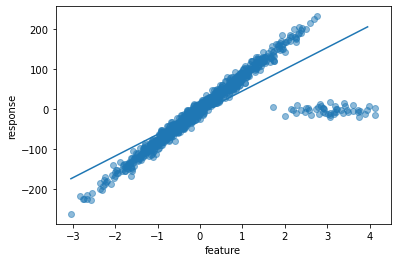

In [69]:
plt.scatter(X, y, alpha=.5)
plt.plot(line_X, line_y, label="Linear Regression fit")
plt.xlabel("feature")
plt.ylabel("response")

Text(0, 0.5, 'response')

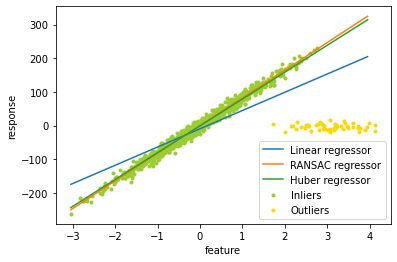

In [70]:
model_ransac = RANSACRegressor()

model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


huber = HuberRegressor().fit(X, y)

# Predict data of estimated models

line_y_ransac = model_ransac.predict(line_X)
line_y_huber = huber.predict(line_X)


plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, label='Linear regressor')
plt.plot(line_X, line_y_ransac, label='RANSAC regressor')
plt.plot(line_X, line_y_huber, label='Huber regressor')
plt.legend(loc='lower right')
plt.xlabel("feature")
plt.ylabel("response")

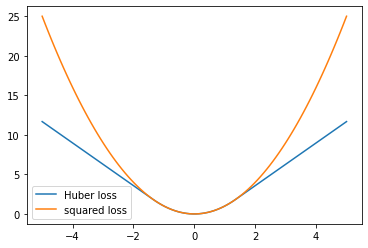

In [71]:
def huber_loss(x):
    eps = 1.35
    mask = np.abs(x) < eps
    res = 2 * eps * np.abs(x) - eps**2
    res[mask] = x[mask] ** 2
    return res

line = np.linspace(-5, 5, 100)
plt.plot(line, huber_loss(line), label="Huber loss")
plt.plot(line, line ** 2, label="squared loss")
plt.legend()

# RANSAC

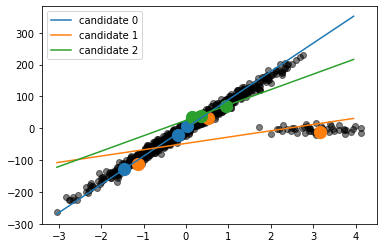

In [72]:
rng = np.random.RandomState(0)
plt.scatter(X, y, c='k', alpha=.5)
candidates = []
for i in range(3):
    perm = rng.permutation(X.shape[0])[:3]
    X_sample, y_sample = X[perm], y[perm]
    candidate = LinearRegression().fit(X_sample, y_sample)
    candidates.append(candidate)
    line, = plt.plot(line_X, candidate.predict(line_X), label="candidate {}".format(i))
    plt.scatter(X_sample, y_sample, c=line.get_color(), s=150)
plt.legend()

In [73]:
residual_threshold = np.median(np.abs(y - np.median(y)))

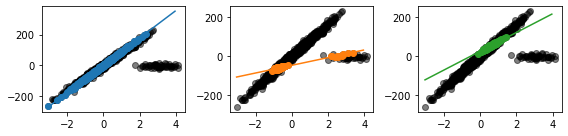

In [74]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
fig, axes = plt.subplots(1, 3, figsize=(8, 2))
for ax, candidate, c in zip(axes, candidates, colors):
    residuals = (y - candidate.predict(X)) ** 2
    inliers = residuals < residual_threshold
    ax.scatter(X, y, c='k', alpha=.5)
    line, = ax.plot(line_X, candidate.predict(line_X), label="candidate {}".format(i), c=c)
    ax.scatter(X[inliers], y[inliers], c=c)
plt.tight_layout()